In [1]:
import pandas as pd
import numpy as np
import xarray as xr



In [2]:
import pandas as pd
import numpy as np

# Zeitstempel generieren (stündlich von 2023-01-01 bis 2025-03-01)
time_index = pd.date_range(start="2023-01-01", end="2025-03-01", freq="H")

# Beispiel-Koordinaten (Breitengrad, Längengrad)
coordinates = [
    (54.32, 10.14),  # Kiel, Deutschland
    (60.39, 5.32),   # Bergen, Norwegen
    (36.85, -6.27),  # Cádiz, Spanien
    (-33.87, 151.21) # Sydney, Australien
]

# Funktion zur Generierung realistischer Ozeandaten mit saisonalen Schwankungen
def generate_ocean_data(time_index):
    n = len(time_index)
    t = np.arange(n)

    # Jahreszeitliche Schwankungen simulieren (Sinus-Funktion)
    seasonality = np.sin(2 * np.pi * t / (24 * 365))  # Jahresperiode

    # Wassertemperatur (°C) mit saisonalen Schwankungen
    water_temp = 10 + 5 * seasonality + np.random.normal(0, 1, n)

    # Wasserhöhe (m) mit zufälligen Schwankungen (Gezeiten)
    water_height = 1.5 + 0.5 * np.sin(2 * np.pi * t / (12)) + np.random.normal(0, 0.2, n)

    # Windgeschwindigkeit (m/s) mit variablen Böen
    wind_speed = 5 + 2 * np.cos(2 * np.pi * t / (24 * 7)) + np.random.normal(0, 1, n)

    return water_temp, water_height, wind_speed

# DataFrame erstellen
data = []

for lat, lon in coordinates:
    water_temp, water_height, wind_speed = generate_ocean_data(time_index)
    df = pd.DataFrame({
        "timestamp": time_index,
        "latitude": lat,
        "longitude": lon,
        "water_temperature": water_temp,
        "water_height": water_height,
        "wind_speed": wind_speed
    })
    data.append(df)

# Alle Daten zusammenführen
ocean_data = pd.concat(data, ignore_index=True)


/tmp/ipykernel_455553/3644407468.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  time_index = pd.date_range(start="2023-01-01", end="2025-03-01", freq="H")


In [3]:

# Erstellen der 'position'-Spalte als Tupel aus 'latitude' und 'longitude'
ocean_data['position'] = ocean_data.apply(lambda row: (row['latitude'], row['longitude']), axis=1)

ocean_data

,timestamp,latitude,longitude,water_temperature,water_height,wind_speed,position
0,2023-01-01 00:00:00,54.32,10.14,9.994276,1.388022,7.491047,"(54.32, 10.14)"
1,2023-01-01 01:00:00,54.32,10.14,10.018419,1.863096,7.394576,"(54.32, 10.14)"
2,2023-01-01 02:00:00,54.32,10.14,11.971965,2.339868,7.812259,"(54.32, 10.14)"
3,2023-01-01 03:00:00,54.32,10.14,8.636455,2.356786,5.621357,"(54.32, 10.14)"
4,2023-01-01 04:00:00,54.32,10.14,10.394123,1.688601,6.401884,"(54.32, 10.14)"
...,...,...,...,...,...,...,...
75839,2025-02-28 20:00:00,-33.87,151.21,14.668656,0.825926,6.182086,"(-33.87, 151.21)"
75840,2025-02-28 21:00:00,-33.87,151.21,12.861596,0.880037,5.587244,"(-33.87, 151.21)"
75841,2025-02-28 22:00:00,-33.87,151.21,15.290043,1.470118,6.924327,"(-33.87, 151.21)"
75842,2025-02-28 23:00:00,-33.87,151.21,13.714618,1.327011,6.553024,"(-33.87, 151.21)"


In [4]:
coordinates = ocean_data['position'].unique()
coordinates

array([(54.32, 10.14), (60.39, 5.32), (36.85, -6.27), (-33.87, 151.21)],
      dtype=object)

In [5]:
df_merged = pd.DataFrame({'timestamp': ocean_data['timestamp'].unique()})

for i in range(len(coordinates)):

    ocean_sub_data = ocean_data.loc[ocean_data['position'] == coordinates[i]]

    ocean_sub_data = ocean_sub_data.drop(columns=['latitude', 'longitude'])
   # display(ocean_sub_data)
    cols = ocean_sub_data.columns.to_list()

    cols.remove('timestamp')
    cols.remove('position')

    

    for col in cols:
        ocean_sub_data.rename(columns={col: col + '_' + str(coordinates[i])}, inplace=True)

    ocean_sub_data = ocean_sub_data.drop(columns='position')


    df_merged = df_merged.merge(ocean_sub_data, on='timestamp')
display(df_merged)
    
    

,timestamp,"water_temperature_(54.32, 10.14)","water_height_(54.32, 10.14)","wind_speed_(54.32, 10.14)","water_temperature_(60.39, 5.32)","water_height_(60.39, 5.32)","wind_speed_(60.39, 5.32)","water_temperature_(36.85, -6.27)","water_height_(36.85, -6.27)","wind_speed_(36.85, -6.27)","water_temperature_(-33.87, 151.21)","water_height_(-33.87, 151.21)","wind_speed_(-33.87, 151.21)"
0,2023-01-01 00:00:00,9.994276,1.388022,7.491047,9.821373,1.264345,9.372484,10.360973,1.774362,7.667280,10.569692,1.685336,6.749226
1,2023-01-01 01:00:00,10.018419,1.863096,7.394576,10.875321,1.837223,7.195847,10.099575,1.865221,7.457883,10.276147,1.702096,5.895517
2,2023-01-01 02:00:00,11.971965,2.339868,7.812259,8.866614,1.510050,6.863981,9.718404,2.369361,6.670185,9.156236,1.967800,7.429524
3,2023-01-01 03:00:00,8.636455,2.356786,5.621357,11.390918,1.851027,8.435170,9.411489,2.101665,6.805957,11.105113,1.942718,6.661924
4,2023-01-01 04:00:00,10.394123,1.688601,6.401884,9.302608,1.478170,6.309854,9.171762,1.962866,7.627277,8.900745,1.626643,5.411032
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18956,2025-02-28 20:00:00,13.777306,0.886801,5.094136,13.906483,1.068185,5.261999,13.372485,1.205991,5.221949,14.668656,0.825926,6.182086
18957,2025-02-28 21:00:00,14.627596,0.834239,5.713614,15.353609,0.723336,5.269205,15.598958,1.182564,6.168551,12.861596,0.880037,5.587244
18958,2025-02-28 22:00:00,12.848291,0.812516,4.712312,13.987205,1.208164,6.642011,13.552815,0.849353,3.516135,15.290043,1.470118,6.924327
18959,2025-02-28 23:00:00,13.388632,1.394324,6.062507,14.334985,1.216741,9.256677,15.659837,1.246076,6.087385,13.714618,1.327011,6.553024


In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import pandas as pd

df = df_merged.copy()

# Setze das Zielvariable (z.B. Wassertemperatur in Kiel, 54.32, 10.14)
target_column = "water_temperature_(54.32, 10.14)"
X = df.drop(columns=["timestamp", target_column])  # Features
y = df[target_column]  # Zielvariable

# Train-Test-Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

# Modell trainieren
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Feature Importance abrufen
importances = rf.feature_importances_

# Als DataFrame darstellen
feature_importance_df = pd.DataFrame({"Feature": X.columns, "Importance": importances})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)



In [7]:
# Anzeigen der wichtigsten Features
display(feature_importance_df.head(10))

,Feature,Importance
8,"water_temperature_(-33.87, 151.21)",0.507970
5,"water_temperature_(36.85, -6.27)",0.226609
2,"water_temperature_(60.39, 5.32)",0.200087
10,"wind_speed_(-33.87, 151.21)",0.008405
3,"water_height_(60.39, 5.32)",0.008368
1,"wind_speed_(54.32, 10.14)",0.008315
4,"wind_speed_(60.39, 5.32)",0.008294
7,"wind_speed_(36.85, -6.27)",0.008188
0,"water_height_(54.32, 10.14)",0.007992
9,"water_height_(-33.87, 151.21)",0.007913


In [8]:
from sklearn.inspection import permutation_importance

# Berechnung der Permutations-Feature-Importance
result = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=42)

# DataFrame erstellen
perm_importance_df = pd.DataFrame({"Feature": X.columns, "Importance": result.importances_mean})
perm_importance_df = perm_importance_df.sort_values(by="Importance", ascending=False)

print(perm_importance_df.head(10))


                               Feature  Importance
8   water_temperature_(-33.87, 151.21)    0.178756
5     water_temperature_(36.85, -6.27)    0.102477
2      water_temperature_(60.39, 5.32)    0.085995
0          water_height_(54.32, 10.14)    0.000234
9        water_height_(-33.87, 151.21)    0.000228
3           water_height_(60.39, 5.32)    0.000192
10         wind_speed_(-33.87, 151.21)    0.000087
4             wind_speed_(60.39, 5.32)   -0.000040
1            wind_speed_(54.32, 10.14)   -0.000062
7            wind_speed_(36.85, -6.27)   -0.000144


In [9]:
import shap

# SHAP-Explainer für Random Forest
explainer = shap.Explainer(rf, X_train)
shap_values = explainer(X_test)




/home/marco/venv/.eval/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|===================| 3786/3793 [06:41<00:00]        

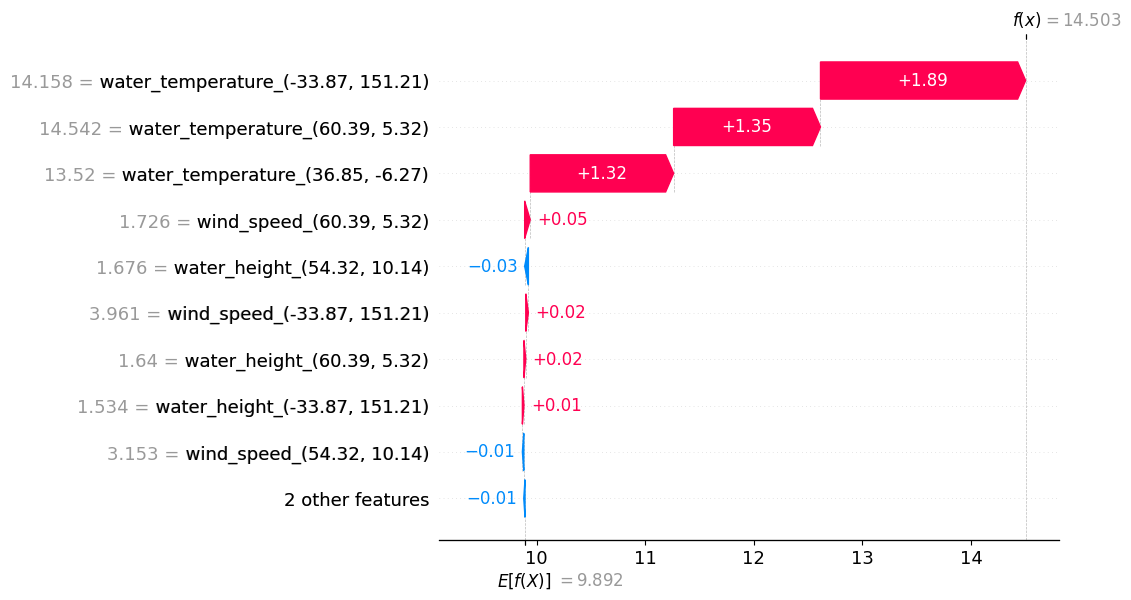

In [10]:
# Wasserfall-Plot für ein Beispiel
shap.plots.waterfall(shap_values[0])